In [1]:
import numpy as np
import pandas as pd
import pandasql
import seaborn as sns
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn import feature_selection
from sklearn.cross_validation import ShuffleSplit
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.cross_validation import ShuffleSplit, train_test_split
from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.metrics import f1_score
import sklearn.learning_curve as curves
import matplotlib.pyplot as plt
from time import time


%matplotlib inline

RuntimeError: module compiled against API version 0xb but this version of numpy is 0xa

RuntimeError: module compiled against API version 0xb but this version of numpy is 0xa

RuntimeError: module compiled against API version 0xb but this version of numpy is 0xa

RuntimeError: module compiled against API version 0xb but this version of numpy is 0xa

RuntimeError: module compiled against API version 0xb but this version of numpy is 0xa

/home/amywu/anaconda3/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/amywu/anaconda3/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/home/amywu/anaconda3/lib/python2.7/site-packages/sklearn/learning_curve.py:23: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  

In [2]:
df = pd.read_csv('conversion_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316200 entries, 0 to 316199
Data columns (total 6 columns):
country                316200 non-null object
age                    316200 non-null int64
new_user               316200 non-null int64
source                 316200 non-null object
total_pages_visited    316200 non-null int64
converted              316200 non-null int64
dtypes: int64(4), object(2)
memory usage: 14.5+ MB


## Data Exploration

In [3]:
df.describe()

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


In [4]:
print 'data set contains contries from %s' %(set(df['country']))
print 'data set contains {} conversions out of {} samples'.format(len(df[df['converted'] == 1]), len(df))
print 'conversion percentage is {}%'.format(format(float(len(df[df['converted'] == 1]))/len(df)*100))

data set contains contries from set(['Germany', 'China', 'US', 'UK'])
data set contains 10200 conversions out of 316200 samples
conversion percentage is 3.22580645161%


In [5]:
print 'top 5 old ages are {} years old'.format(df.nlargest(5, 'age')['age'].values)

top 5 old ages are [123 111  79  77  73] years old


In [6]:
df[(df['country'] == 'US') & (df['converted'] == 1)]

,country,age,new_user,source,total_pages_visited,converted
54,US,25,1,Direct,18,1
72,US,33,0,Seo,15,1
87,US,18,0,Direct,19,1
130,US,17,0,Ads,19,1
182,US,19,0,Ads,9,1
213,US,17,0,Seo,21,1
229,US,35,0,Seo,17,1
257,US,38,0,Seo,12,1
340,US,32,0,Direct,17,1
349,US,17,0,Seo,13,1


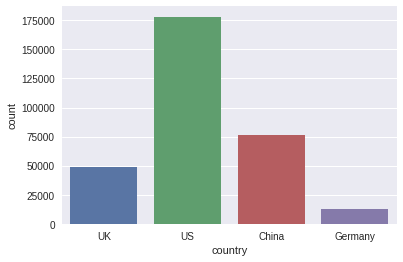

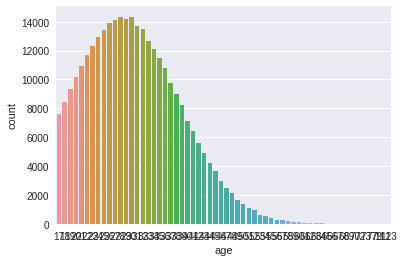

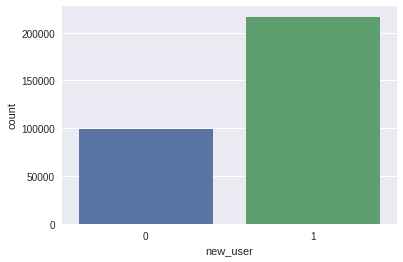

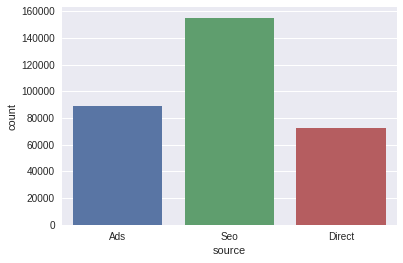

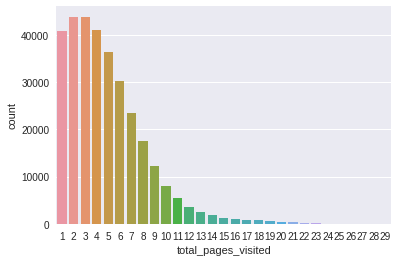

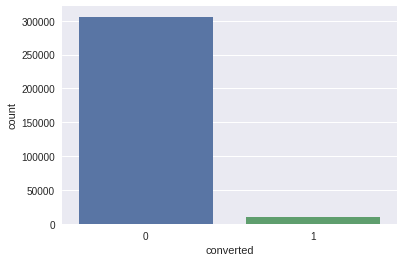

In [7]:
for item in list(df):
    plt.figure()
    ax = sns.countplot(x = df[item], data = df)

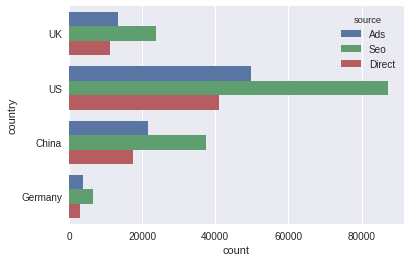

In [23]:
plt.figure()
ax = sns.countplot(y = df['country'], hue=df['source'], data = df)

In [8]:
df_c = pd.get_dummies(df, prefix=['country', 'src'], columns=['country', 'source'])

In [9]:
df_c.describe()

,age,new_user,total_pages_visited,converted,country_China,country_Germany,country_UK,country_US,src_Ads,src_Direct,src_Seo
count,316200.000000,316200.000000,316200.000000,316200.000000,316200.000000,316200.000000,316200.000000,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258,0.242258,0.041290,0.153226,0.563226,0.280645,0.229032,0.490323
std,8.271802,0.464331,3.341104,0.176685,0.428450,0.198961,0.360206,0.495987,0.449315,0.420211,0.499907
min,17.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,123.000000,1.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
for item in list(df_c)[4:]:
    cnt = len(df_c[(df_c[item] == 1) & (df_c['converted'] == 1)])
    print "{} has conversion rate of {} %".format(item, float(cnt)/ len(df[df_c[item] == 1]) * 100)
    

country_China has conversion rate of 0.133155792277 %
country_Germany has conversion rate of 6.25 %
country_UK has conversion rate of 5.26315789474 %
country_US has conversion rate of 3.78006872852 %
src_Ads has conversion rate of 3.44827586207 %
src_Direct has conversion rate of 2.81690140845 %
src_Seo has conversion rate of 3.28947368421 %


In [11]:
label = df_c['converted']
features = df_c.drop('converted', axis = 1)
print "Processed feature columns ({} total features):\n{}".format(len(features.columns), list(features.columns))

Processed feature columns (10 total features):
['age', 'new_user', 'total_pages_visited', 'country_China', 'country_Germany', 'country_UK', 'country_US', 'src_Ads', 'src_Direct', 'src_Seo']


## Model Development

In [12]:
def stratified_shuffle_split(X,y,num_test):
    ''' 
    X: pandas data frame features
    y: pandas data frame label 
    num_test: int, number of testing set
    Preprocesses the raw data and converts non-numeric binary variables into
    binary (0/1) variables. Converts categorical variables into dummy variables. 
    '''
    
    S = StratifiedShuffleSplit(y,1,test_size=num_test,random_state=3)
    for train_idx, test_idx in S:
        X_train, X_test = X.iloc[train_idx],X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx],y.iloc[test_idx]
    
    return X_train, X_test, y_train, y_test
    
def preprocess_features(X):
    ''' 
    X: pandas data frame
    Preprocesses the raw data and converts non-numeric binary variables into
    binary (0/1) variables. Converts categorical variables into dummy variables. 
    '''
    
    # Initialize new output DataFrame
    output = pd.DataFrame(index = X.index)

    # Investigate each feature column for the data
    for col, col_data in X.iteritems():
        
        # If data type is non-numeric, replace all yes/no values with 1/0
        if col_data.dtype == object:
            col_data = col_data.replace(['yes', 'no'], [1, 0])

        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object:
            # Example: 'school' => 'school_GP' and 'school_MS'
            col_data = pd.get_dummies(col_data, prefix = col)  
        
        # Collect the revised columns
        output = output.join(col_data)
    
    return output


In [13]:
def train_classifier(clf, X_train, y_train):
    '''
    clf : classifier object
    Fits a classifier to the training data. 
    '''
    
    # Start the clock, train the classifier, then stop the clock
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    
    # Print the results
    print "Trained model in {:.4f} seconds".format(end - start)
    return clf
        
def predict_labels(clf, features, label):
    ''' Makes predictions using a fit classifier based on F1 score. '''
    
    # Start the clock, make predictions, then stop the clock
    start = time()
    y_pred = clf.predict(features)
    end = time()
    
    # Print and return results
    print "Made predictions in {:.4f} seconds.".format(end - start)
    return f1_score(label.values, y_pred)
    

def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Train and predict using a classifer based on F1 score. '''
    
    # Indicate the classifier and the training set size
    print "Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train))
    
    # Train the classifier
    train_classifier(clf, X_train, y_train)
    
    # Print the results of prediction for both training and testing
    print "F1 score for training set: {:.4f}.".format(predict_labels(clf, X_train, y_train))
    print "F1 score for test set: {:.4f}.".format(predict_labels(clf, X_test, y_test))
    
def feature_importance(clf, X_train, y_train):
    """
    clf: classifier object
    """
    train_classifier(clf, X_train, y_train)
    importances = clf.feature_importances_
    sort_ind = np.argsort(importances)
    pad = np.arange(len(X_train.columns.values)) + 0.5
    plt.figure(figsize=(14,16))
    plt.barh(pad,importances[sort_ind],align='center')
    plt.xlabel("Relative Importance")
    plt.yticks(pad,X_train.columns.values[sort_ind])
    plt.title("Variable Importance")
    #plt.savefig('Importances.png')
    plt.show()
    
def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """

    score = r2_score(y_true,y_predict)
    return score

def pipeline_training(TreesCLFs, selector):
    """
    pipeline to perform model training.
    TreesCLFs: classifiers 
    selector: from feature.selection.SelectFromModels
    """
    for clf in TreesCLFs:
        pipe_clf = Pipeline([('select', selector), ('classification', clf)]) 
        print "TRAINING CLASSIFIER:\t ", str(clf)
        for size in [len(X_train)]:
            X = X_train[:size]
            y = y_train[:size]
            train_predict(pipe_clf, X, y, X_test, y_test)
        print "\n"

In [14]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

X_train, X_test, y_train, y_test= stratified_shuffle_split(features, label, num_test = 0.2)
# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

Training set has 252960 samples.
Testing set has 63240 samples.


In [15]:
clf_et = ExtraTreesClassifier(n_estimators = 250, random_state = 0)
selector = feature_selection.SelectFromModel(clf_et)
TreesCLFs=[AdaBoostClassifier(random_state=3), GradientBoostingClassifier(random_state=3), RandomForestClassifier(random_state=3), BaggingClassifier(random_state=3)]
pipeline_training(TreesCLFs, selector)

TRAINING CLASSIFIER:	  AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=3)
Training a Pipeline using a training set size of 252960. . .
Trained model in 18.8003 seconds
Made predictions in 1.0093 seconds.
F1 score for training set: 0.6976.
Made predictions in 0.3176 seconds.
F1 score for test set: 0.6844.


TRAINING CLASSIFIER:	  GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=3,
              subsample=1.0, verbose=0, warm_start=False)
Training a Pipeline using a training set size of 252960. . .
Trained model in 21.6742 seconds
Made predictions in 0.3392 seconds.
F1 score for training set: 0.6976.
Made

Trained model in 2.9880 seconds


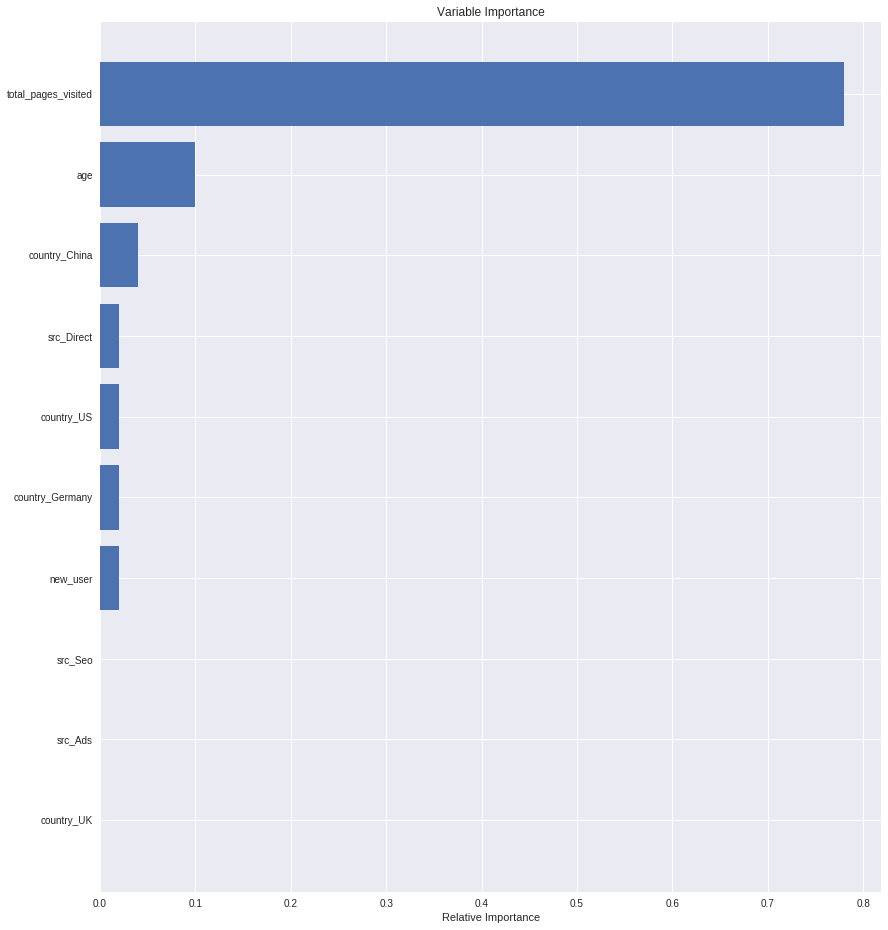

TRAINING CLASSIFIER:	  AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=3)
Training a Pipeline using a training set size of 252960. . .
Trained model in 5.3847 seconds
Made predictions in 0.9314 seconds.
F1 score for training set: 0.7085.
Made predictions in 0.2407 seconds.
F1 score for test set: 0.7044.


TRAINING CLASSIFIER:	  GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=3,
              subsample=1.0, verbose=0, warm_start=False)
Training a Pipeline using a training set size of 252960. . .
Trained model in 7.8240 seconds
Made predictions in 0.2138 seconds.
F1 score for training set: 0.7102.
Made p

In [16]:
clf_ab = AdaBoostClassifier(random_state=3)
feature_importance(clf_ab, X_train, y_train)
selector=feature_selection.SelectFromModel(clf_ab)
TreesCLFs=[AdaBoostClassifier(random_state=3), GradientBoostingClassifier(random_state=3), RandomForestClassifier(random_state=3), BaggingClassifier(random_state=3)]
pipeline_training(TreesCLFs, selector)

## Evaluation of Model Performance

In [17]:
def grid_search(X_train, y_train, pipeline, params):
    """
    X_train: pandas dataframe, train features
    y_train: pandas dataframe, train label
    pipeline:
    params: parameters of classifier object 
    """
    
    print "Start training..."
    def metrics_f1(y_true,y_predict):
        return f1_score(y_true, y_predict)

    f1_scorer = make_scorer(metrics_f1)

    #Perform grid search on the classifier using the f1_scorer as the scoring method
    
    cv_sets = StratifiedShuffleSplit(y_train, n_iter=10, test_size=95, random_state=3)
    t_start = time() 
    grid_obj = GridSearchCV(pipeline, params, scoring = f1_scorer, cv = cv_sets) 

    #Fit the grid search object to the training data and find the optimal parameters
    grid_obj = grid_obj.fit(X_train, y_train)

    # Get the estimator
    clf = grid_obj.best_estimator_
    
    print clf
    
    # Report the final F1 score for training and testing after parameter tuning
    print "Tuned model has a training F1 score of {:.4f}.".format(predict_labels(clf, X_train, y_train))
    t_end = time()
    print "{} time spent for training.\t", (t_end - t_start)
    print "\n"
    print grid_obj.grid_scores_

In [18]:
pipeline = Pipeline([('feature_selection', selector), ('Ada', AdaBoostClassifier())])
params = {'Ada__n_estimators':[50, 100]}
grid_search(X_train, y_train, pipeline, params)

Start training...
Pipeline(steps=[('feature_selection', SelectFromModel(estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=3),
        prefit=False, threshold=None)), ('Ada', AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=100, random_state=None))])
Made predictions in 1.7730 seconds.
Tuned model has a training F1 score of 0.7076.
{} time spent for training.	136.759809971


[mean: 0.67190, std: 0.14151, params: {'Ada__n_estimators': 50}, mean: 0.69667, std: 0.19203, params: {'Ada__n_estimators': 100}]


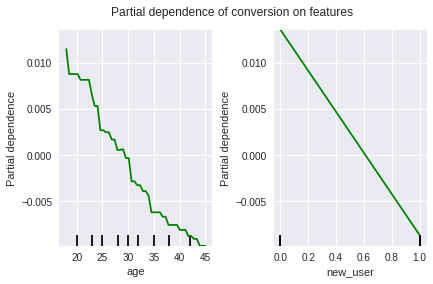

In [19]:
# partial dependence plot
from sklearn.ensemble.partial_dependence import plot_partial_dependence, partial_dependence
from sklearn.ensemble import GradientBoostingRegressor

names = list(features.columns)

X_train, X_test, y_train, y_test = stratified_shuffle_split(features, label, num_test = 0.2)
clf_gb = GradientBoostingRegressor()
clf_gb.fit(X_train, y_train)

features_col = [0, 1]
fig, axs = plot_partial_dependence(gbrt = clf_gb, X = X_train, features = features_col, feature_names = names, grid_resolution = 50)

fig.suptitle('Partial dependence of conversion on features')
plt.subplots_adjust(top=0.9)  # tight_layout causes overlap with suptitle
fig = plt.figure()
plt.show()

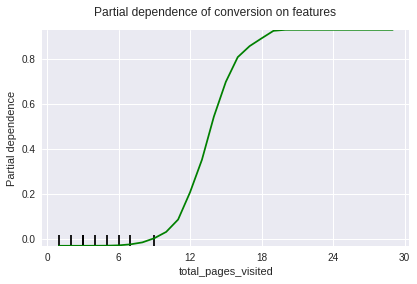

In [20]:
features_col = [2]
fig, axs = plot_partial_dependence(gbrt = clf_gb, X = X_train, features = features_col, feature_names = names, grid_resolution = 50)

fig.suptitle('Partial dependence of conversion on features')
plt.subplots_adjust(top=0.9)  # tight_layout causes overlap with suptitle
fig = plt.figure()
plt.show()

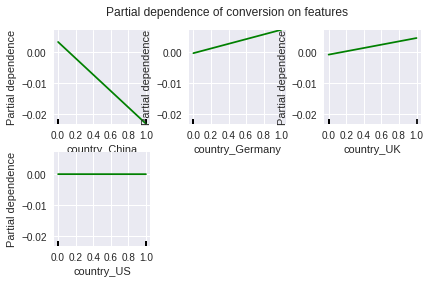

In [21]:
features_col = [3, 4, 5, 6]
fig, axs = plot_partial_dependence(gbrt = clf_gb, X = X_train, features = features_col, feature_names = names, grid_resolution = 50)

fig.suptitle('Partial dependence of conversion on features')
plt.subplots_adjust(top=0.9)  # tight_layout causes overlap with suptitle
fig = plt.figure()
plt.show()

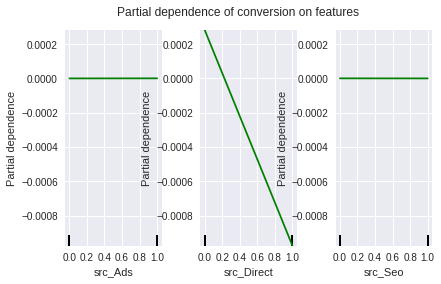

In [22]:
features_col = [7, 8, 9]
fig, axs = plot_partial_dependence(gbrt = clf_gb, X = X_train, features = features_col, feature_names = names, grid_resolution = 50)

fig.suptitle('Partial dependence of conversion on features')
plt.subplots_adjust(top=0.9)  # tight_layout causes overlap with suptitle
fig = plt.figure()
plt.show()